In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from skimage import io

# Set global variables to run notebook
data_root = 'C:/_data/' # set to whever the data is being stored
use_true_labels = False
if use_true_labels:
    label_file = os.path.join(data_root, 'commercials\\data\\true_labels.txt')
    feature_file = os.path.join(data_root, 'commercials\\data\\true_labels_images_features.txt')
else:
    label_file = os.path.join(data_root, 'commercials\\data\\rekall_train.txt')
    feature_file = os.path.join(data_root, 'commercials\\data\\rekall_train_images_features.txt')

In [17]:
label_file = os.path.join(data_root, 'commercials\\data\\test.txt')
feature_file = os.path.join(data_root, 'commercials\\data\\test_images_features.txt')

In [18]:
def load_data(filename):
    
    videos = []
    images = []
    labels = []
    
    with open(filename, 'r') as f:
        for line in f.readlines():
            if use_true_labels:
                video, image, label = line.split(',')
            else:
                video, image, label = line.split(' ')
            videos.append(int(video))
            images.append(int(image))
            labels.append(int(label))
            
    return videos, images, labels

In [19]:
videos, images, labels = load_data(label_file) # load the data from the training file
print('%d frames to process' % len(images))

7496 frames to process


**Compute feature vector for each frame in dataset**

In [20]:
print(feature_file)

C:/_data/commercials\data\test_images_features.txt


In [21]:
with open(feature_file, 'w+') as f:
    
    for frame in range(len(images)):
        img = io.imread(os.path.join(data_root, 
                                     'commercials/images/{}/{:04d}.jpg'.format(videos[frame], images[frame])))
        intensity = np.sum(img, axis=2) / 3 # collapse channels and average
        x = [np.mean(intensity), np.std(intensity)]
        x += (list(np.mean(np.mean(img, axis=0), axis=0))) # RGB means
        x += (list(np.std(np.mean(img, axis=0), axis=0))) # RGB std dev
        
        h = img.shape[0]
        w = img.shape[1]
        i_step = h // 3
        j_step = w // 3
        for i in range(0, (h // 3) * 3, i_step):
            for j in range(0, (w // 3) * 3, j_step):
                img_slice = img[i:i + i_step, j:j + j_step, :]
                intensity = np.sum(img_slice, axis=2) / 3
                x += [np.mean(intensity)]
                x += [np.std(intensity)]
                x += (list(np.mean(np.mean(img_slice, axis=0), axis=0))) # RGB means
                x += (list(np.std(np.mean(img_slice, axis=0), axis=0))) # RGB std dev
#                 plt.imshow(img_slice)
#                 plt.show()
        
        x = [ round(elem, 2) for elem in x ]
#         print(len(x))
        f.write('%.2d, %.2d, %.2d, %s\n' 
                % (videos[frame], images[frame], labels[frame], str(x)))

**Graph Results**

In [95]:
labels = []
x = []

with open(feature_file, 'r') as f:
    for line in f.readlines():
        video, image, label, data = line.split(',', 3)
        labels.append(int(label))
        data = eval(data)
        x.append(data)
#         means.append(float(mean))
#         stddevs.append(float(stddev))
x = np.array(x)

***All Channels***

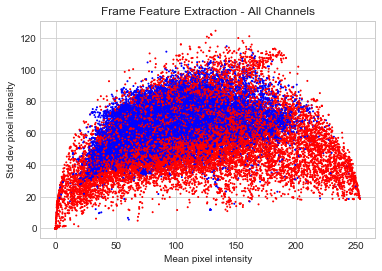

In [100]:
means = x[:,[0]]
stddevs = x[:,[1]]

color = ['blue' if x==0 else 'red' for x in labels]
# plt.scatter(means[:1000], stddevs[:1000], c=color[:1000])
plt.scatter(means, stddevs, c=color, s=1)
plt.title("Frame Feature Extraction - All Channels")
plt.xlabel("Mean pixel intensity")
plt.ylabel("Std dev pixel intensity")
plt.show()

***Red Channel***

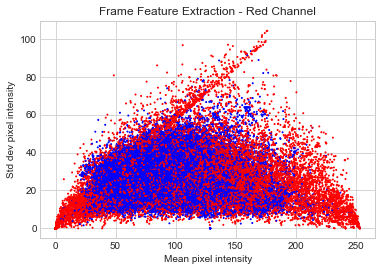

In [101]:
means = x[:,[2]] # Red
stddevs = x[:,[5]]

color = ['blue' if x==0 else 'red' for x in labels]
# plt.scatter(means[:1000], stddevs[:1000], c=color[:1000])
plt.scatter(means, stddevs, c=color, s=1)
plt.title("Frame Feature Extraction - Red Channel")
plt.xlabel("Mean pixel intensity")
plt.ylabel("Std dev pixel intensity")
plt.show()

***Green Channel***

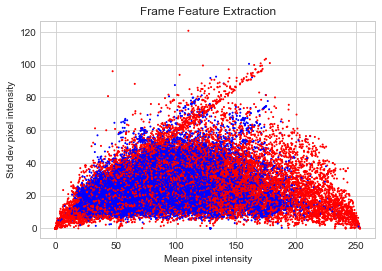

In [98]:
means = x[:,[3]] # Green
stddevs = x[:,[6]]

color = ['blue' if x==0 else 'red' for x in labels]
# plt.scatter(means[:1000], stddevs[:1000], c=color[:1000])
plt.scatter(means, stddevs, c=color, s=1)
plt.title("Frame Feature Extraction - Green Channel")
plt.xlabel("Mean pixel intensity")
plt.ylabel("Std dev pixel intensity")
plt.show()

***Blue Channel***

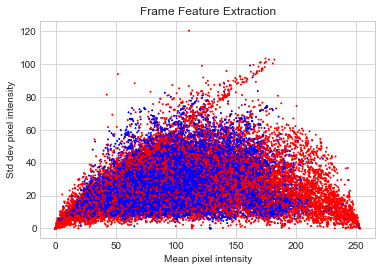

In [99]:
means = x[:,[4]]
stddevs = x[:,[7]]

color = ['blue' if x==0 else 'red' for x in labels]
# plt.scatter(means[:1000], stddevs[:1000], c=color[:1000])
plt.scatter(means, stddevs, c=color, s=1)
plt.title("Frame Feature Extraction - Blue Channel")
plt.xlabel("Mean pixel intensity")
plt.ylabel("Std dev pixel intensity")
plt.show()

**Find interesting examples**

commercials/images/3730/0140.jpg
Red intensity = 160.136094 and std dev = 90.958706


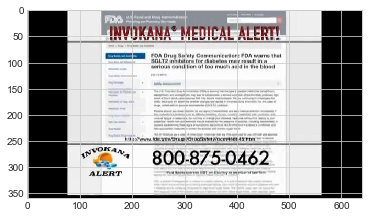

commercials/images/3730/0141.jpg
Red intensity = 158.819575 and std dev = 90.123823


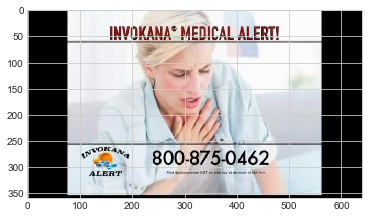

commercials/images/3952/0101.jpg
Red intensity = 163.645022 and std dev = 88.445300


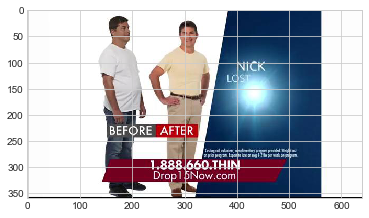

commercials/images/5281/0191.jpg
Red intensity = 159.306688 and std dev = 92.189533


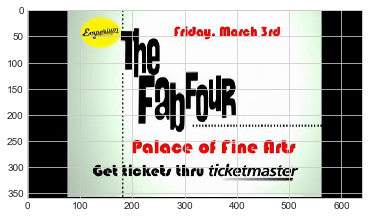

commercials/images/10323/0164.jpg
Red intensity = 174.820000 and std dev = 98.319465


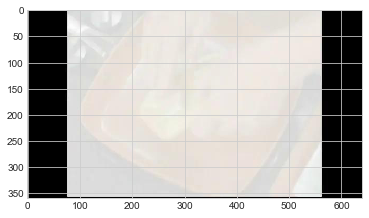

commercials/images/10323/0165.jpg
Red intensity = 156.727374 and std dev = 89.772988


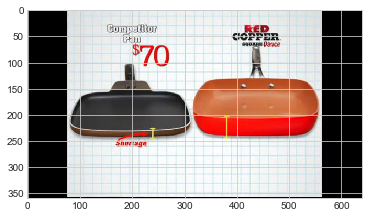

commercials/images/19959/0280.jpg
Red intensity = 165.816272 and std dev = 93.626459


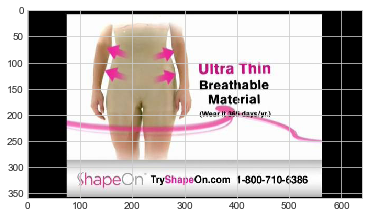

commercials/images/19959/0281.jpg
Red intensity = 166.491029 and std dev = 94.179230


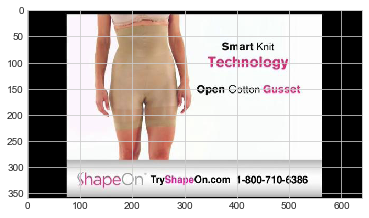

commercials/images/19959/0282.jpg
Red intensity = 172.875386 and std dev = 96.783994


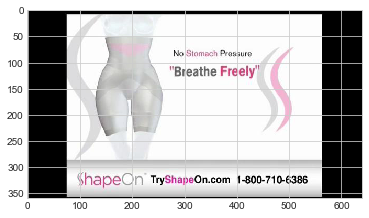

commercials/images/19959/0283.jpg
Red intensity = 167.490747 and std dev = 96.067441


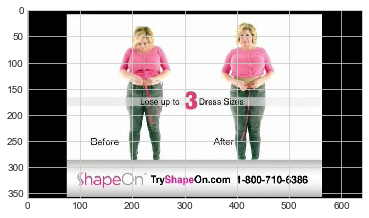

commercials/images/19959/0284.jpg
Red intensity = 165.745486 and std dev = 93.425446


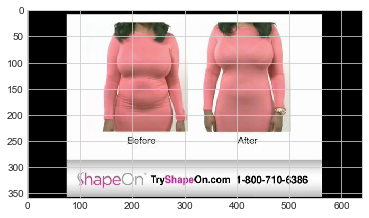

commercials/images/19959/0285.jpg
Red intensity = 164.693112 and std dev = 93.813078


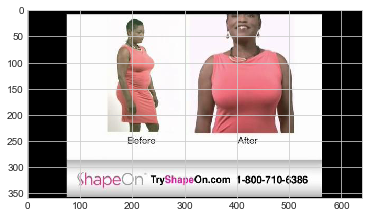

commercials/images/19959/0286.jpg
Red intensity = 155.747747 and std dev = 89.842562


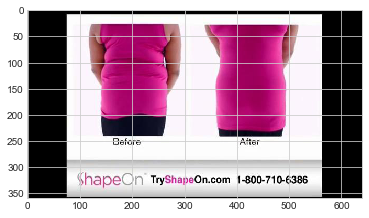

commercials/images/19959/0287.jpg
Red intensity = 167.773346 and std dev = 94.395330


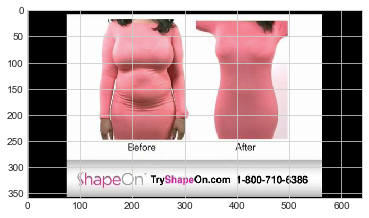

commercials/images/19959/0288.jpg
Red intensity = 170.940911 and std dev = 95.955800


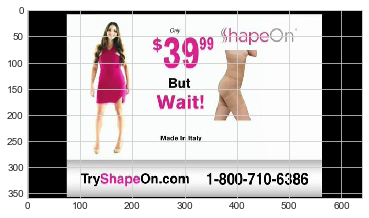

commercials/images/19959/0289.jpg
Red intensity = 154.060829 and std dev = 89.170026


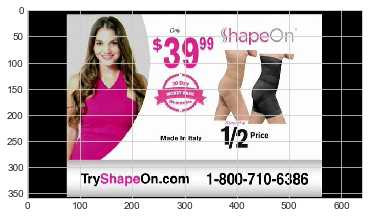

commercials/images/19959/0290.jpg
Red intensity = 166.605838 and std dev = 94.657000


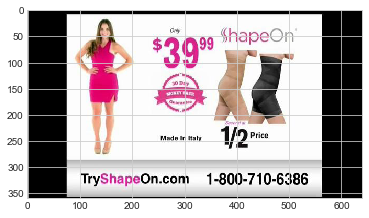

commercials/images/20380/0099.jpg
Red intensity = 161.105560 and std dev = 90.172586


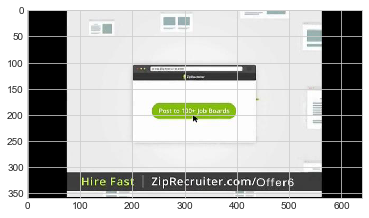

commercials/images/20380/0101.jpg
Red intensity = 163.529601 and std dev = 91.776743


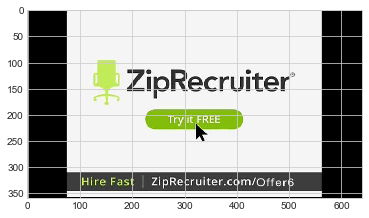

commercials/images/21572/0168.jpg
Red intensity = 166.850100 and std dev = 93.754559


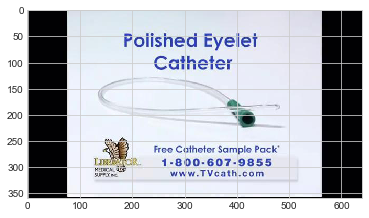

commercials/images/24847/0305.jpg
Red intensity = 171.661094 and std dev = 98.210187


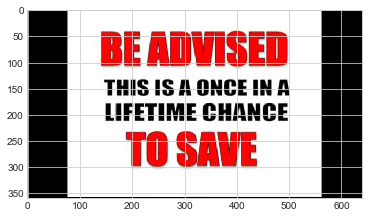

commercials/images/27188/0313.jpg
Red intensity = 151.486528 and std dev = 90.447608


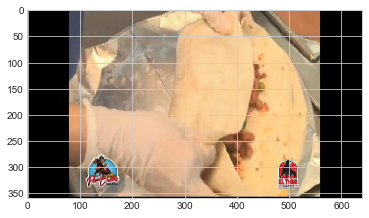

commercials/images/27188/0318.jpg
Red intensity = 154.532240 and std dev = 93.188498


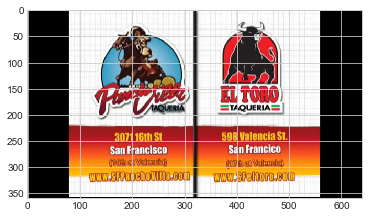

commercials/images/31994/0281.jpg
Red intensity = 173.993572 and std dev = 98.189347


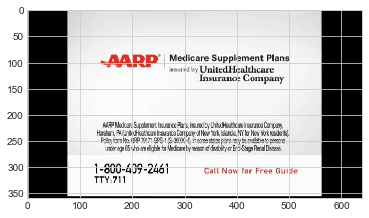

commercials/images/31994/0289.jpg
Red intensity = 169.365286 and std dev = 95.453728


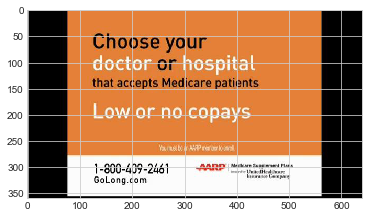

commercials/images/31994/0290.jpg
Red intensity = 167.070100 and std dev = 94.187288


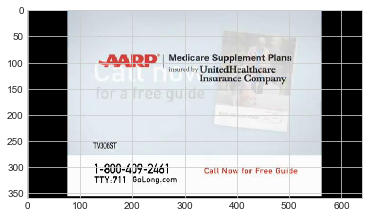

commercials/images/33387/0345.jpg
Red intensity = 152.465621 and std dev = 85.690815


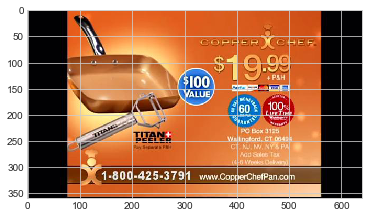

commercials/images/34359/0103.jpg
Red intensity = 158.245916 and std dev = 92.637668


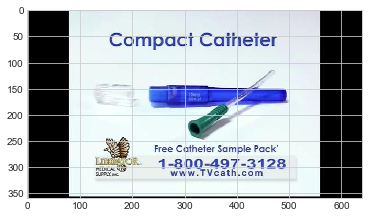

commercials/images/41480/0192.jpg
Red intensity = 169.159062 and std dev = 88.772613


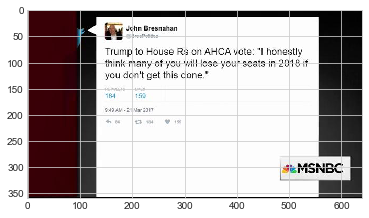

commercials/images/41480/0197.jpg
Red intensity = 162.669900 and std dev = 93.458341


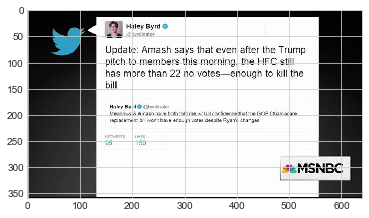

commercials/images/42362/0310.jpg
Red intensity = 154.759362 and std dev = 93.275648


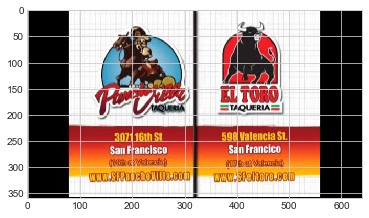

commercials/images/48140/0163.jpg
Red intensity = 158.689740 and std dev = 91.768478


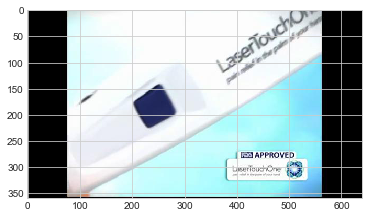

commercials/images/48140/0328.jpg
Red intensity = 175.011793 and std dev = 98.913925


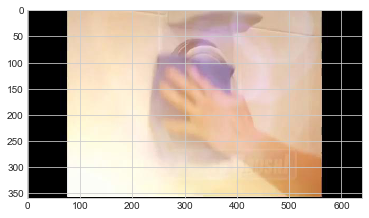

commercials/images/52945/0096.jpg
Red intensity = 159.566011 and std dev = 91.445801


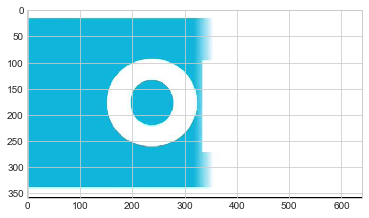

commercials/images/56051/0362.jpg
Red intensity = 154.255443 and std dev = 87.276459


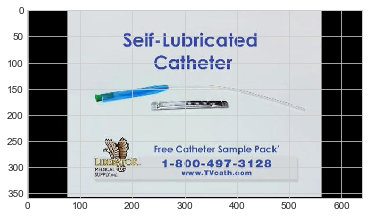

commercials/images/56051/0363.jpg
Red intensity = 157.749588 and std dev = 89.117836


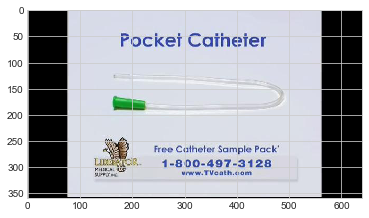

commercials/images/57384/0333.jpg
Red intensity = 162.766341 and std dev = 92.136406


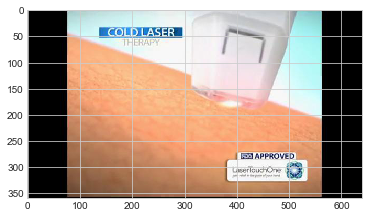

commercials/images/60433/0227.jpg
Red intensity = 159.060022 and std dev = 91.987182


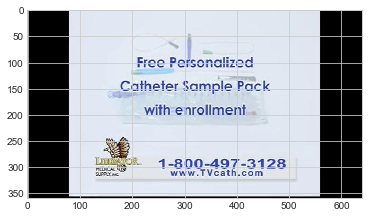

commercials/images/60433/0228.jpg
Red intensity = 165.307057 and std dev = 95.627925


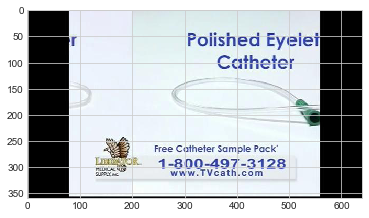

commercials/images/60433/0312.jpg
Red intensity = 158.167786 and std dev = 92.621861


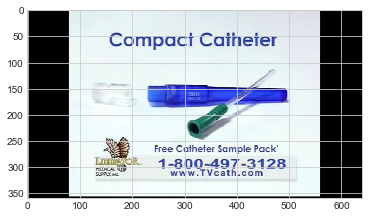

commercials/images/60581/0353.jpg
Red intensity = 163.584640 and std dev = 93.364186


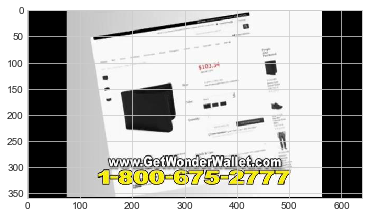

commercials/images/123531/0286.jpg
Red intensity = 170.505382 and std dev = 96.341949


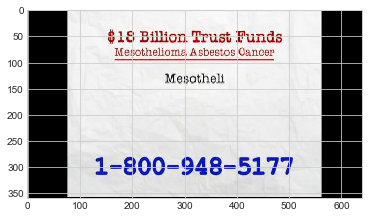

commercials/images/123531/0287.jpg
Red intensity = 167.970812 and std dev = 95.133136


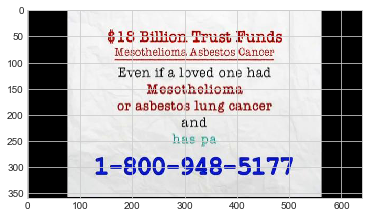

commercials/images/123531/0288.jpg
Red intensity = 167.810074 and std dev = 94.976681


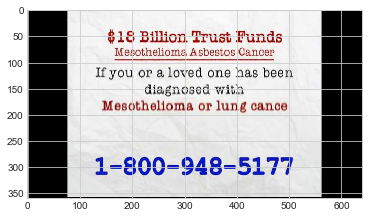

commercials/images/124234/0336.jpg
Red intensity = 169.192339 and std dev = 98.526756


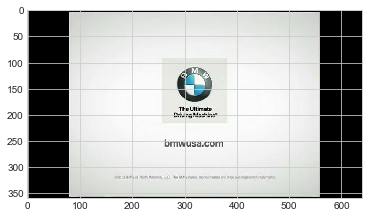

commercials/images/128012/0317.jpg
Red intensity = 151.736272 and std dev = 86.478202


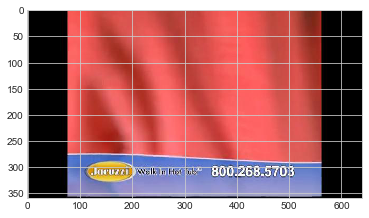

commercials/images/128012/0323.jpg
Red intensity = 154.836936 and std dev = 87.604997


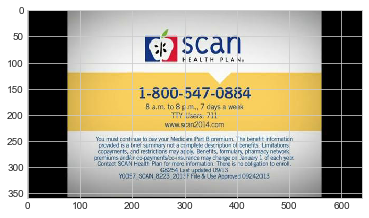

commercials/images/128012/0344.jpg
Red intensity = 157.335334 and std dev = 93.155216


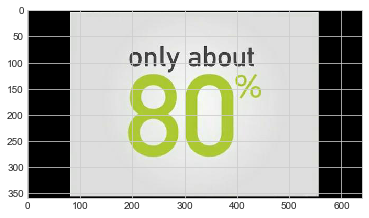

commercials/images/128012/0351.jpg
Red intensity = 174.324136 and std dev = 103.015242


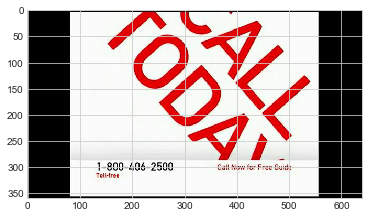

commercials/images/128012/0352.jpg
Red intensity = 172.107140 and std dev = 101.865593


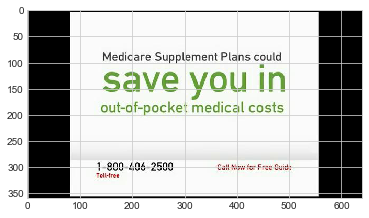

commercials/images/128012/0353.jpg
Red intensity = 176.398815 and std dev = 104.222366


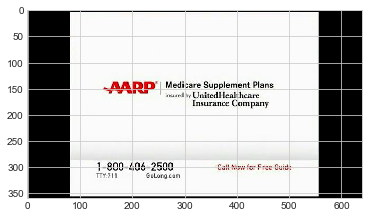

commercials/images/128012/0354.jpg
Red intensity = 175.893572 and std dev = 103.967771


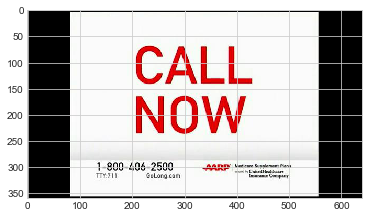

commercials/images/134007/0270.jpg
Red intensity = 171.859957 and std dev = 100.931157


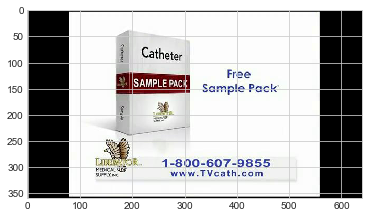

In [107]:
for frame in range(len(images)):
    img = io.imread(os.path.join(data_root, 
                                 'commercials/images/{}/{:04d}.jpg'.format(videos[frame], images[frame])))
    intensity = np.sum(img, axis=2) / 3 # collapse channels and average
    x = [np.mean(intensity), np.std(intensity)]
    x += (list(np.mean(np.mean(img, axis=0), axis=0))) # RGB means
    x += (list(np.std(np.mean(img, axis=0), axis=0))) # RGB std dev
    if 150 < x[2] < 200 and x[5] > 85: # Red intensity between 150 and 200 with std dev over 85
        print('commercials/images/{}/{:04d}.jpg'.format(videos[frame], images[frame]))
        print('Red intensity = %f and std dev = %f' % (x[2], x[5]))
        plt.imshow(img)
        plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

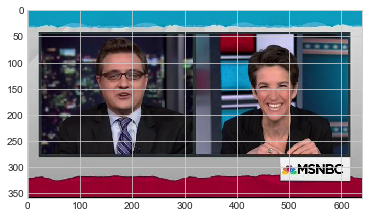

In [4]:
video = 3459
image = 3

img = io.imread(os.path.join(data_root, 'commercials/images/{}/{:04d}.jpg'.format(video, image)))
plt.imshow(img)
plt.show

In [2]:
data = [
    (5, 0.8376),
    (10, 0.8989),
    (20, 0.9107),
    (40, 0.9240),
    (60, 0.9233),
    (80, 0.9243),
    (100, 0.9279),
    (200, 0.9368),
    (300, 0.9344),
    (400, 0.9366),
    (500, 0.9364)
]
data = np.array(data)
y = data[:,1]
x = data[:,0]

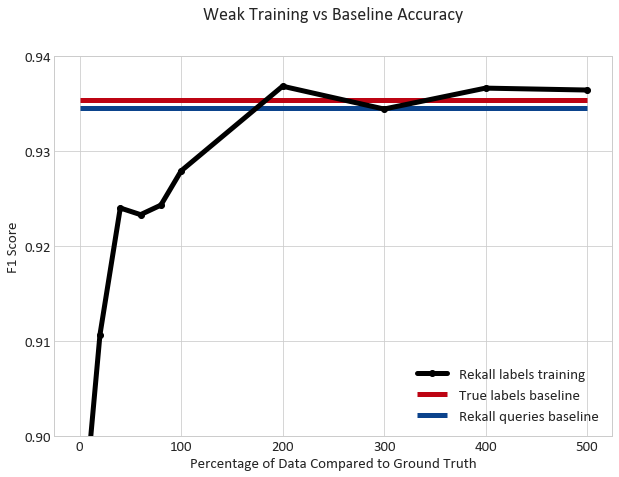

In [32]:
plt.title("Weak Training vs Baseline Accuracy", y=1.08)
plt.xlabel("Percentage of Data Compared to Ground Truth", y=1.08)
plt.ylabel("F1 Score", x=1.08)
plt.hlines(y=0.9353, xmin=0, xmax=500, colors='#bd0413', linestyles='-', lw=5, label='True labels baseline')
plt.hlines(y=0.93455, xmin=0, xmax=500, colors='#0b438c', linestyles='-', lw=5, label='Rekall queries baseline')
plt.plot(x, y, '-o', c='k', linewidth=5, label='Rekall labels training')
plt.ylim(bottom=0.90, top=0.94)
plt.legend(loc="lower right")
plt.rcParams["font.family"] = "Calibri"
plt.rcParams["font.size"] = "30"
plt.rcParams["figure.figsize"] = [10, 7]
plt.show()